In [595]:
import sys
import os
sys.path.insert(0, '../../')
import plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

analyzer = plots.DataAnalyser()

# def r2(x,y):
#     # Linear regression (1st-degree polynomial)
#     coeffs = np.polyfit(x, y, 1)
#     y_pred = np.polyval(coeffs, x)


#     # R-squared calculation
#     ss_res = np.sum((y - y_pred)**2)
#     ss_tot = np.sum((y - np.mean(y))**2)
#     r_squared = 1 - (ss_res / ss_tot)

#     r_squared_2 = r2_score(y, y_pred)

#     if np.abs(r_squared - r_squared_2) > 0.01: raise Exception('error in R2')

#     # Print R²
#     print(f"R²: {r_squared:.4f}")

def r2(x,y,deg):
    # Linear regression (1st-degree polynomial)
    coeffs = np.polyfit(x, y, deg)
    model = np.poly1d(coeffs)
    y_pred = model(x)


    # R-squared calculation
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    r_squared_2 = r2_score(y, y_pred)

    if np.abs(r_squared - r_squared_2) > 0.01: raise Exception('error in R2')

    # Print R²
    print(f"R²: {r_squared:.4f}")
    return model



In [596]:
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 14})
path = 'dataset_metadata_official.csv'
df_total = pd.read_csv(path, sep=',')

# Filters - reasonable trajectories
df_reasonable = df_total[(df_total['mpc_success'] == True) & (df_total['mpc_RMSe'] <= 0.5) & (df_total['nn_success'] == True)]
print('len reasonable', len(df_reasonable))
df_reasonable.groupby('trajectory_type').count()

len reasonable 65


,sim_id,disturbed_inputs,simulation_time (s),time_sample (s),N,M,mpc_success,num_iterations,mpc_RMSe,mpc_execution_time (s),...,period (s),inter_position_RMSe,RMSe_u0,RMSe_u1,RMSe_u2,RMSe_u3,RMSe_u4,RMSe_u5,RMSe_u6,RMSe_u7
trajectory_type,,,,,,,,,,,,,,,,,,,,,
circle_xy,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
circle_xz,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
line,19,19,19,19,19,19,19,19,19,19,...,0,19,19,19,19,19,19,19,19,19
lissajous_xy,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18


In [597]:
df_reasonable.sort_values('nn_execution_time (s)', ascending=False)[['sim_id','trajectory_type', 'nn_execution_time (s)']]
df_reasonable.sort_values('nn_RMSe', ascending=True)[['sim_id','trajectory_type', 'nn_RMSe']]

,sim_id,trajectory_type,nn_RMSe
94,23,lissajous_xy,0.065126
88,16,lissajous_xy,0.073348
82,9,lissajous_xy,0.088287
95,24,lissajous_xy,0.091482
89,17,lissajous_xy,0.117329
...,...,...,...
126,27,line,0.494532
130,31,line,0.507313
177,38,circle_xy,0.507504
70,7,circle_xz,0.516662


percentile 2 (0.95) = 0.5075039753004983


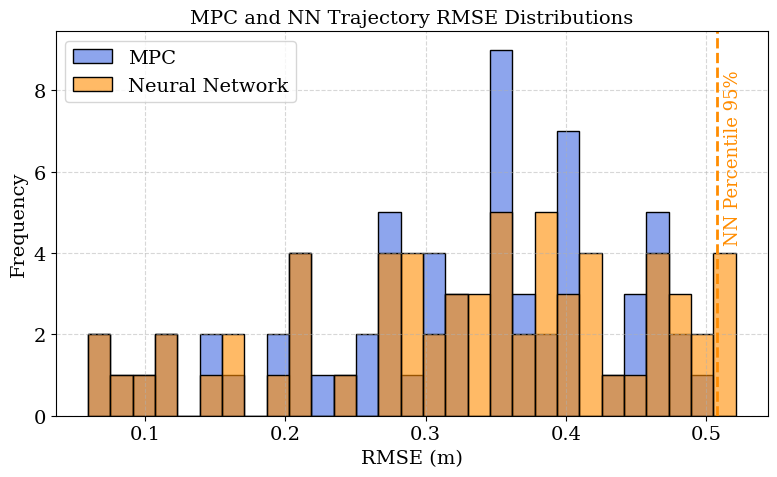

In [598]:
analyzer.plot_histogram(df_reasonable, 'mpc_RMSe', 'nn_RMSe', 'RMSE (m)','MPC and NN Trajectory RMSE Distributions', ['MPC', 'Neural Network'], save_name='trajectory_rmse.pdf', percentile_2=0.95, stat='count', show_mean=False, num_bins = 30)
#c.plot_histogram('training_results\Training dataset v0 - octorotor/', 'mpc_execution_time (s)', 'nn_execution_time', '$t_{execution}/t_{simulation}$', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='simulation_time (s)')


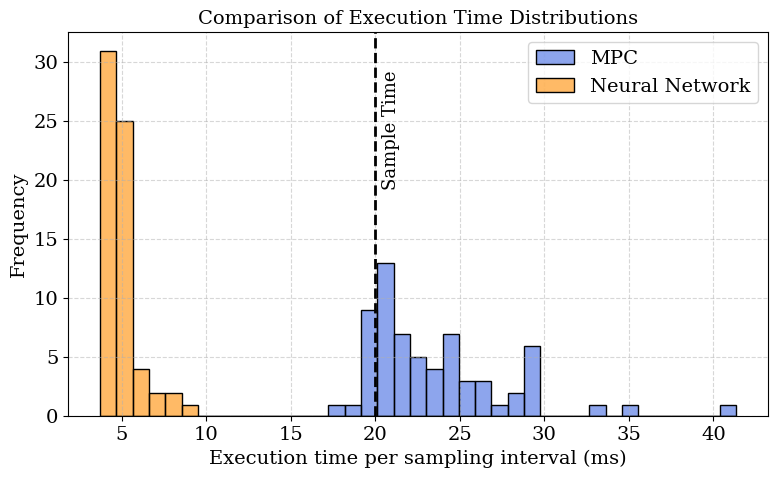

In [599]:
analyzer.plot_histogram(df_reasonable, 'mpc_execution_time (s)', 'nn_execution_time (s)', 'Execution time per sampling interval (ms)', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='num_iterations', save_name='exec_time_hist.pdf', gain=1000, stat='count', show_mean=False, num_bins=40)
#c.plot_histogram('training_results\Training dataset v0 - octorotor/', 'mpc_execution_time (s)', 'nn_execution_time', 'CPU Use Percentage', 'Comparison of CPU Use Percentage', ['MPC', 'Neural Network'], normalization_column=['time_sample (s)', 'num_iterations'])



In [600]:
stats_rmse = analyzer.stats_simulations(df_reasonable, 'mpc_RMSe', 'nn_RMSe')
stats_rmse

,Controller,min,max,mean,std
0,MPC,0.059345,0.496112,0.314924,0.114516
1,Neural Network,0.065126,0.520974,0.333001,0.122307


In [601]:
stats_execution_time = analyzer.stats_simulations(df_reasonable, 'mpc_execution_time_per_iteration', 'nn_execution_time_per_iteration')
stats_execution_time


,Controller,min,max,mean,std
0,MPC,0.017538,0.041351,0.023621,0.004318
1,Neural Network,0.003715,0.008716,0.004960,0.001023


C:\Users\mathe\AppData\Local\Temp\ipykernel_11372\991164806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['nn_max_abs_phi'] = np.max(np.abs(df_reasonable[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_11372\991164806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['mpc_max_abs_phi'] = np.max(np.abs(df_reasonable[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)


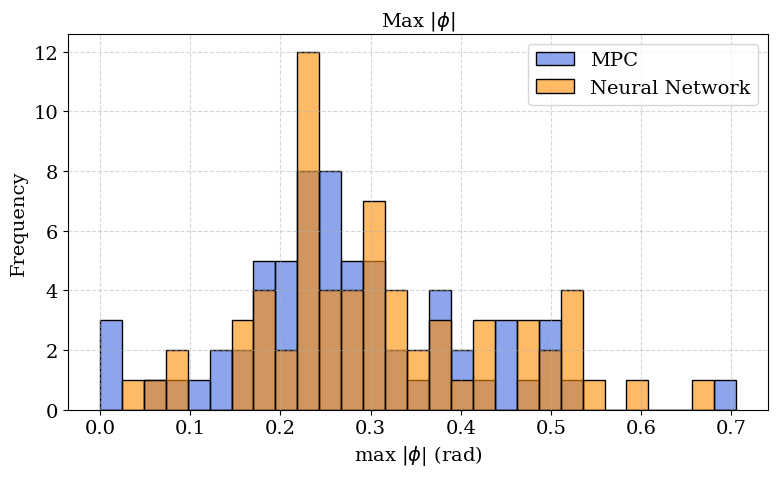

In [602]:
df_reasonable['nn_max_abs_phi'] = np.max(np.abs(df_reasonable[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
df_reasonable['mpc_max_abs_phi'] = np.max(np.abs(df_reasonable[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)

analyzer.plot_histogram(df_reasonable, 'mpc_max_abs_phi', 'nn_max_abs_phi', 'max $|\\phi$| (rad)', 'Max $|\\phi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

In [603]:
stats_max_phi = analyzer.stats_simulations(df_reasonable, 'mpc_max_phi (rad)', 'nn_max_phi (rad)')
stats_max_phi

,Controller,min,max,mean,std
0,MPC,1.863060e-08,0.705262,0.224519,0.129138
1,Neural Network,4.554505e-02,0.679987,0.253867,0.134450


C:\Users\mathe\AppData\Local\Temp\ipykernel_11372\269989624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['nn_max_abs_theta'] = np.max(np.abs(df_reasonable[['nn_max_theta (rad)','nn_min_theta (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_11372\269989624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['mpc_max_abs_theta'] = np.max(np.abs(df_reasonable[['mpc_max_theta (rad)','mpc_min_theta (rad)']]), axis = 1)


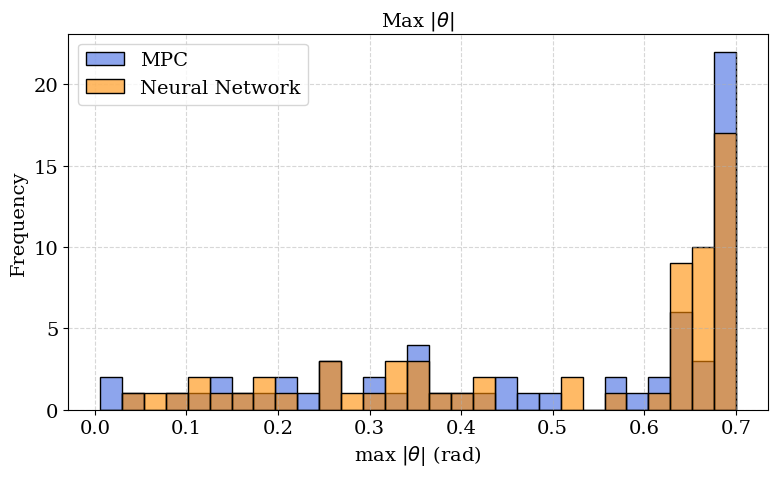

In [604]:
df_reasonable['nn_max_abs_theta'] = np.max(np.abs(df_reasonable[['nn_max_theta (rad)','nn_min_theta (rad)']]), axis = 1)
df_reasonable['mpc_max_abs_theta'] = np.max(np.abs(df_reasonable[['mpc_max_theta (rad)','mpc_min_theta (rad)']]), axis = 1)

analyzer.plot_histogram(df_reasonable, 'mpc_max_abs_theta', 'nn_max_abs_theta', 'max $|\\theta$| (rad)', 'Max $|\\theta|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

C:\Users\mathe\AppData\Local\Temp\ipykernel_11372\571555454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['nn_max_abs_psi'] = np.max(np.abs(df_reasonable[['nn_max_psi (rad)','nn_min_psi (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_11372\571555454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['mpc_max_abs_psi'] = np.max(np.abs(df_reasonable[['mpc_max_psi (rad)','mpc_min_psi (rad)']]), axis = 1)


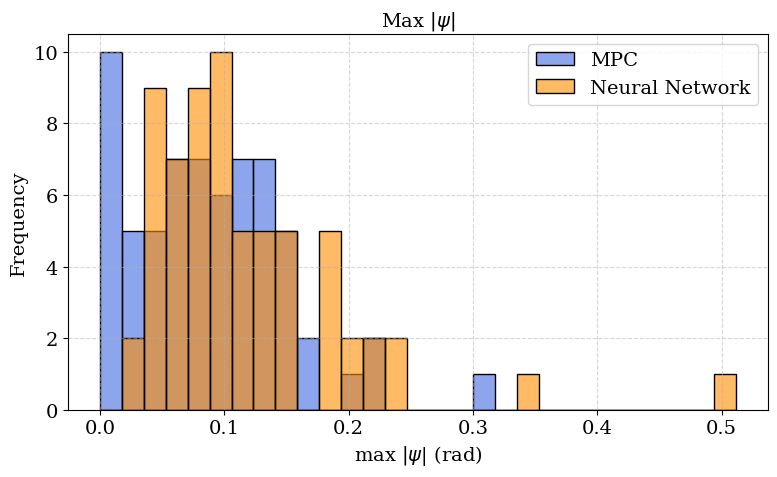

In [605]:
df_reasonable['nn_max_abs_psi'] = np.max(np.abs(df_reasonable[['nn_max_psi (rad)','nn_min_psi (rad)']]), axis = 1)
df_reasonable['mpc_max_abs_psi'] = np.max(np.abs(df_reasonable[['mpc_max_psi (rad)','mpc_min_psi (rad)']]), axis = 1)

analyzer.plot_histogram(df_reasonable, 'mpc_max_abs_psi', 'nn_max_abs_psi', 'max $|\\psi$| (rad)', 'Max $|\\psi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

In [606]:
# x = df_performance['period (s)']
# y1 = df_performance['nn_max_phi']
# y2 = df_performance['mpc_max_phi (rad)']

# fig = plt.figure()
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.xlabel('Period (s)')
# plt.ylabel('Max $\\phi$ (rad)')
# plt.title('Max Phi vs Period')
# plt.legend(['Neural Network', 'MPC'])

In [607]:
# x = df_performance['period (s)']
# y1 = df_performance['nn_max_theta']
# y2 = df_performance['mpc_max_theta (rad)']

# fig = plt.figure()
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.xlabel('Period (s)')
# plt.ylabel('Max $\\theta$ (rad)')
# plt.title('Max Theta vs Period')
# plt.legend(['Neural Network', 'MPC'])

percentile 0.95 = 0.21587987250809


c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:705: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:707: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


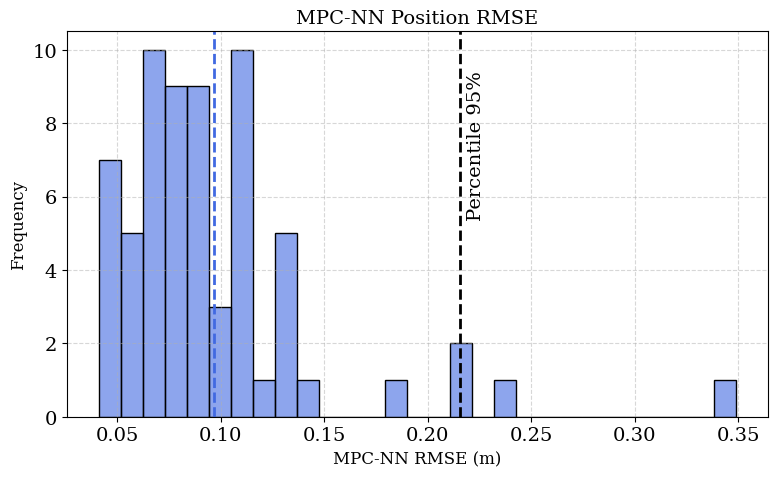

In [608]:
# MPC-NN Position RMSE
analyzer.plot_histogram_temp(df_reasonable, 'inter_position_RMSe', 'MPC-NN RMSE (m)', 'MPC-NN Position RMSE', percentile=0.95, save_name='inter-rmse.pdf')

C:\Users\mathe\AppData\Local\Temp\ipykernel_11372\1614591183.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_reasonable[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])


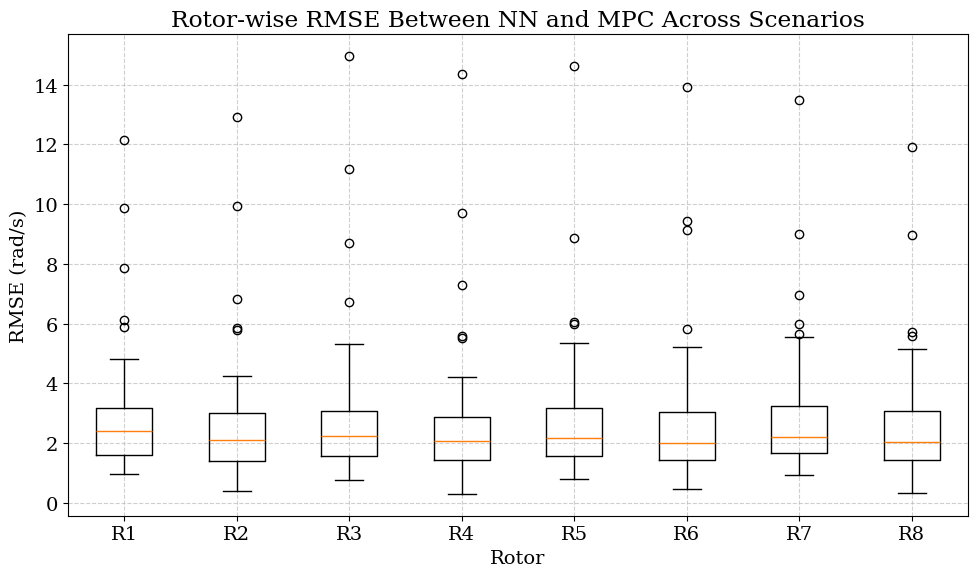

In [609]:
# Rotor-wise RMSE Between NN and MPC across scenarios
plt.figure(figsize=(10, 6))
plt.boxplot([df_reasonable[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])
plt.ylabel("RMSE (rad/s)")
plt.xlabel("Rotor")
plt.title("Rotor-wise RMSE Between NN and MPC Across Scenarios")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/omega_boxplots.pdf')
plt.show()

In [610]:
df_reasonable[df_reasonable['RMSe_u0'] > 4][['mpc_RMSe', 'nn_RMSe']]

,mpc_RMSe,nn_RMSe
70,0.440967,0.516662
73,0.319212,0.353242
109,0.203797,0.279695
115,0.214389,0.355044
121,0.250166,0.288902
128,0.327255,0.457485
130,0.353991,0.507313


In [611]:
df_reasonable.groupby('trajectory_type').size()

trajectory_type
circle_xy       26
circle_xz        2
line            19
lissajous_xy    18
dtype: int64

In [612]:
# 01/07/2025 - Same dataset for normal and single-rotor failures
# Load the dataset
df_total = pd.read_csv('dataset_metadata_clip.csv')
#df_total = pd.read_csv('temp-delete.csv')
df_total = df_total[~df_total['trajectory_type'].str.contains('#')] #TODO: descomentar
df_total['global_id'] = df_total['trajectory_type'] + df_total['trajectory_id'].astype(str)
df_total[df_total['mpc_success'] == True]
df_total['perc_diff'] = (df_total['nn_RMSe'] - df_total['mpc_RMSe']) / df_total['mpc_RMSe']
df_total['nn_max_abs_phi'] = np.max(np.abs(df_total[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
df_total['mpc_max_abs_phi'] = np.max(np.abs(df_total[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)
df_total['nn_max_abs_theta'] = np.max(np.abs(df_total[['nn_max_theta (rad)','nn_min_theta (rad)']]), axis = 1)
df_total['mpc_max_abs_theta'] = np.max(np.abs(df_total[['mpc_max_theta (rad)','mpc_min_theta (rad)']]), axis = 1)
df_total['nn_max_abs_psi'] = np.max(np.abs(df_total[['nn_max_psi (rad)','nn_min_psi (rad)']]), axis = 1)
df_total['mpc_max_abs_psi'] = np.max(np.abs(df_total[['mpc_max_psi (rad)','mpc_min_psi (rad)']]), axis = 1)
#df_total = df_total[~((df_total['trajectory_type'].str.contains('lissajous_xy')) & (df_total['radius (m)'] <= 1.5))] # TODO: deletar
# Split into normal and rotor failure datasets
df_normal = df_total[df_total['operation_mode'] == 'normal']
df_rotor_failure = df_total[df_total['operation_mode'] == 'total_failure']


In [613]:
# Filters - RMSe < 0.5 para operação normal. O dataset com rotor failure deve ser filtrado para conter as mesmas trajetórias que o normal

df_normal = df_normal[df_normal['mpc_RMSe'] < 0.6]
#df_normal = df_normal[df_normal['trajectory_type'] != 'line']
#df_normal = df_normal[df_normal['perc_diff'] < 0.5]


df_rotor_failure = df_rotor_failure[df_rotor_failure['global_id'].isin(df_normal['global_id'])]
#df_rotor_failure = df_rotor_failure[df_rotor_failure['mpc_RMSe'] < 0.75]
#df_rotor_failure = df_rotor_failure[df_rotor_failure['perc_diff'] > -0.3]
#df_rotor_failure = df_rotor_failure[df_rotor_failure['mpc_max_abs_phi'] < 1.2]
df_rotor_failure = df_rotor_failure[df_rotor_failure['mpc_max_abs_phi'] <= 2] # TODO: TEMP DELETE
df_normal = df_normal[df_normal['global_id'].isin(df_rotor_failure['global_id'])]


# print('len df_normal',len(df_normal), 'len df_rotor_failure', len(df_rotor_failure))


In [614]:
# Groupby
df_normal.groupby('trajectory_type')['N'].count()

trajectory_type
circle_xy       21
line            65
lissajous_xy    63
Name: N, dtype: int64

percentile 2 (0.95) = 0.5979336704467562


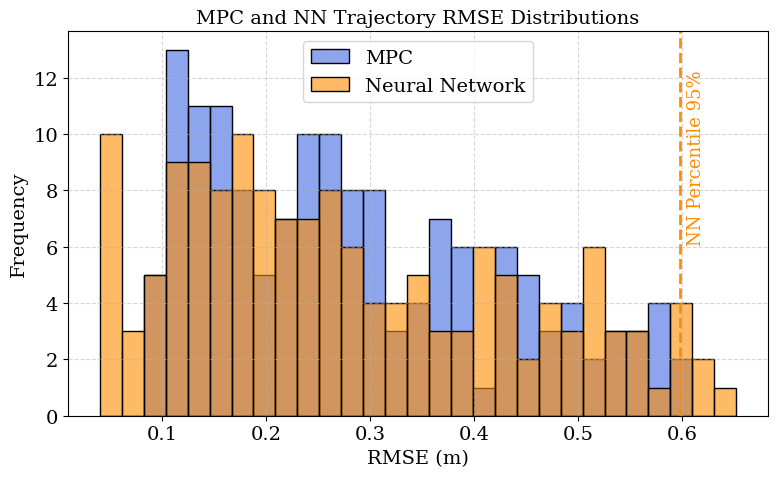

In [615]:
analyzer.plot_histogram(df_normal, 'mpc_RMSe', 'nn_RMSe', 'RMSE (m)','MPC and NN Trajectory RMSE Distributions', ['MPC', 'Neural Network'], save_name='trmse_new_normal.pdf', percentile_2=0.95, stat='count', show_mean=False, num_bins = 30)

In [616]:
stats_rmse = analyzer.stats_simulations(df_normal, 'mpc_RMSe', 'nn_RMSe')
print('Normal Trajectory RMSE stats')
stats_rmse

Normal Trajectory RMSE stats


,Controller,min,max,mean,std
0,MPC,0.083336,0.599810,0.285419,0.141282
1,Neural Network,0.039738,0.652166,0.279610,0.162516


121       circle_xy
77        circle_xy
441            line
229    lissajous_xy
119       circle_xy
           ...     
277    lissajous_xy
205    lissajous_xy
217    lissajous_xy
245    lissajous_xy
189    lissajous_xy
Name: trajectory_type, Length: 149, dtype: object
percentile 1 (0.95) = 0.8790802307296713
percentile 2 (0.95) = 0.6774530732258466


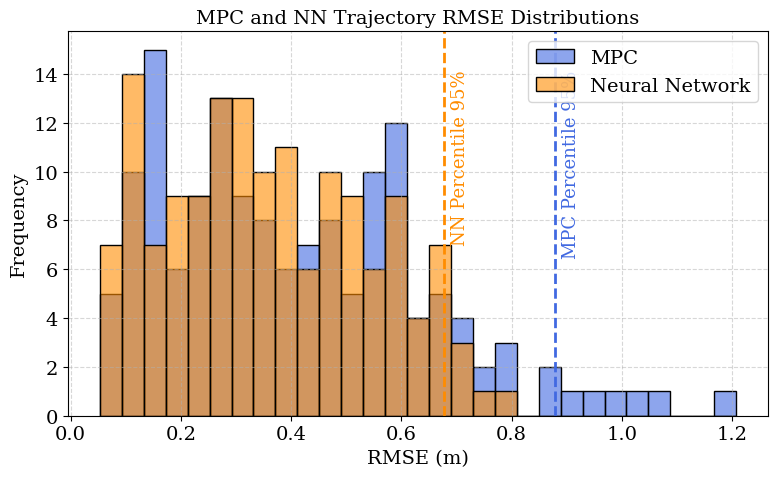

In [617]:
print(df_rotor_failure.sort_values('mpc_RMSe', ascending=False)['trajectory_type'])
#df_rotor_failure = df_rotor_failure[df_rotor_failure['mpc_RMSe'] < 2] # Offset, pode tirar
analyzer.plot_histogram(df_rotor_failure, 'mpc_RMSe', 'nn_RMSe', 'RMSE (m)','MPC and NN Trajectory RMSE Distributions', ['MPC', 'Neural Network'], save_name='trmse_new_1rf.pdf', percentile_1=0.95,percentile_2=0.95, stat='count', show_mean=False, num_bins = 30)

In [618]:
stats_rmse = analyzer.stats_simulations(df_rotor_failure, 'mpc_RMSe', 'nn_RMSe')
print('Single Rotor Failure Trajectory RMSE stats')
stats_rmse

Single Rotor Failure Trajectory RMSE stats


,Controller,min,max,mean,std
0,MPC,0.053055,1.207364,0.408901,0.237086
1,Neural Network,0.068623,0.789497,0.359668,0.183412


C:\Users\mathe\AppData\Local\Temp\ipykernel_11372\140862616.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_normal[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])


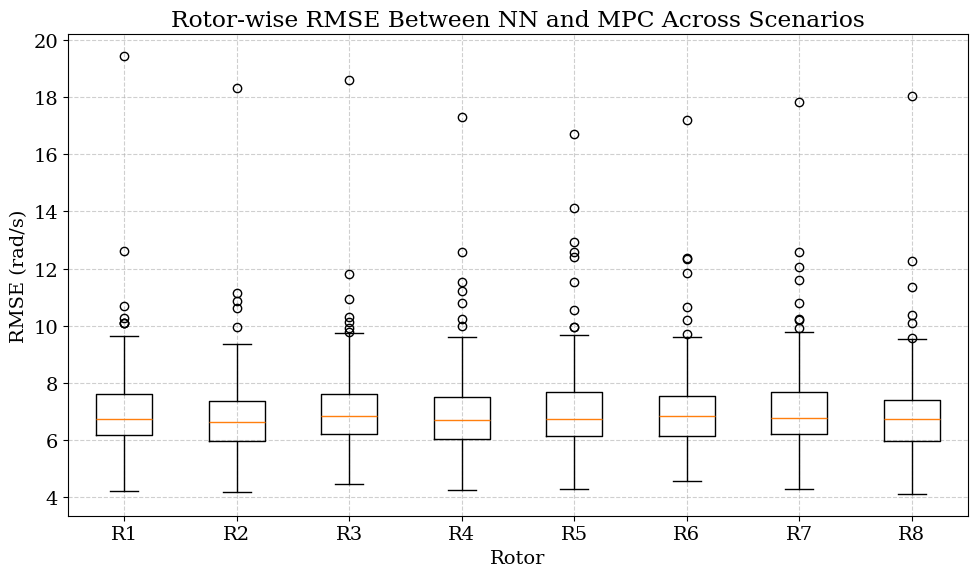

In [619]:
# Rotor-wise RMSE Between NN and MPC across scenarios
plt.figure(figsize=(10, 6))
plt.boxplot([df_normal[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])
plt.ylabel("RMSE (rad/s)")
plt.xlabel("Rotor")
plt.title("Rotor-wise RMSE Between NN and MPC Across Scenarios")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/omega_boxplots_normal.pdf')
plt.show()

C:\Users\mathe\AppData\Local\Temp\ipykernel_11372\241932331.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_rotor_failure[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])


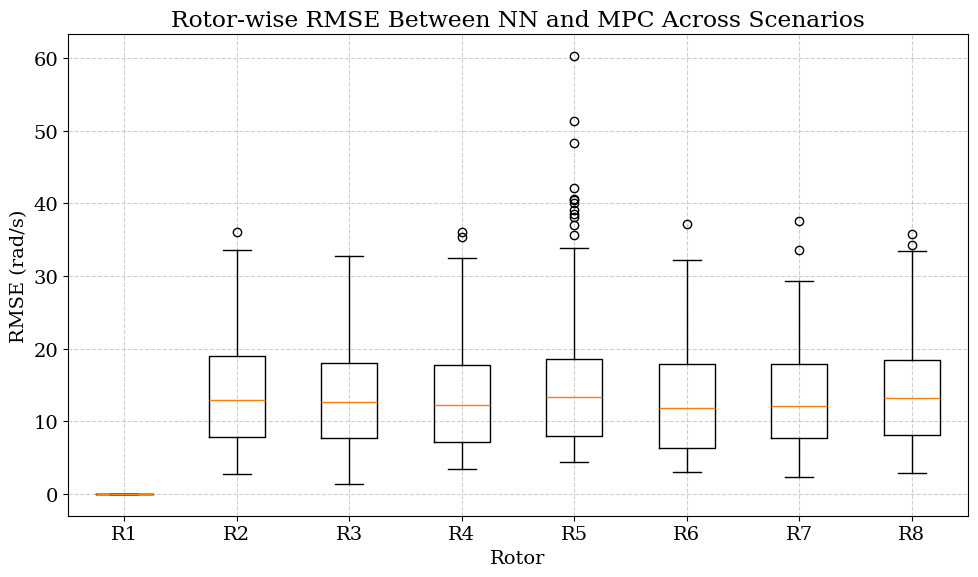

In [620]:
# Rotor-wise RMSE Between NN and MPC across scenarios
plt.figure(figsize=(10, 6))
plt.boxplot([df_rotor_failure[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])
plt.ylabel("RMSE (rad/s)")
plt.xlabel("Rotor")
plt.title("Rotor-wise RMSE Between NN and MPC Across Scenarios")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/omega_boxplots_1rf.pdf')
plt.show()

percentile 0.95 = 0.2814730972021583


c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:705: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:707: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


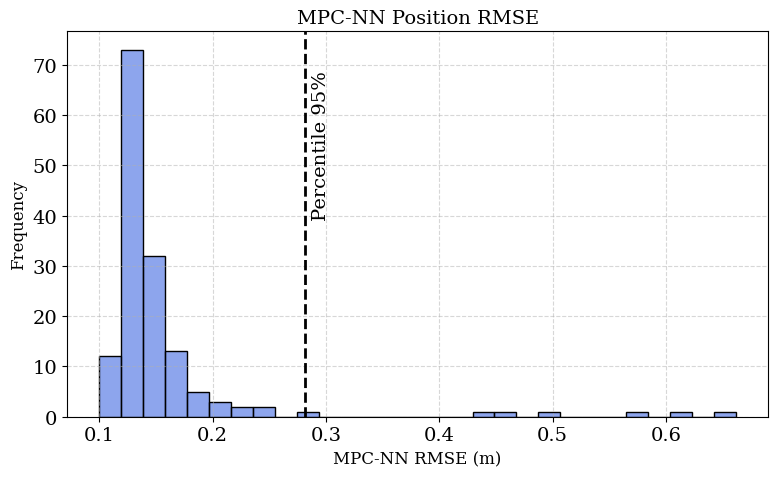

In [621]:
analyzer.plot_histogram_temp(df_normal, 'inter_position_RMSe', 'MPC-NN RMSE (m)', 'MPC-NN Position RMSE', percentile=0.95,show_mean=False,save_name='mpcnn_rmse_normal.pdf')

In [622]:
stats_rmse = analyzer.stats_simulations(df_normal, 'inter_position_RMSe','inter_position_RMSe')
stats_rmse

,Controller,min,max,mean,std
0,MPC,0.099797,0.661798,0.158443,0.084771
1,Neural Network,0.099797,0.661798,0.158443,0.084771


percentile 0.95 = 0.7227216146342533


c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:705: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:707: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


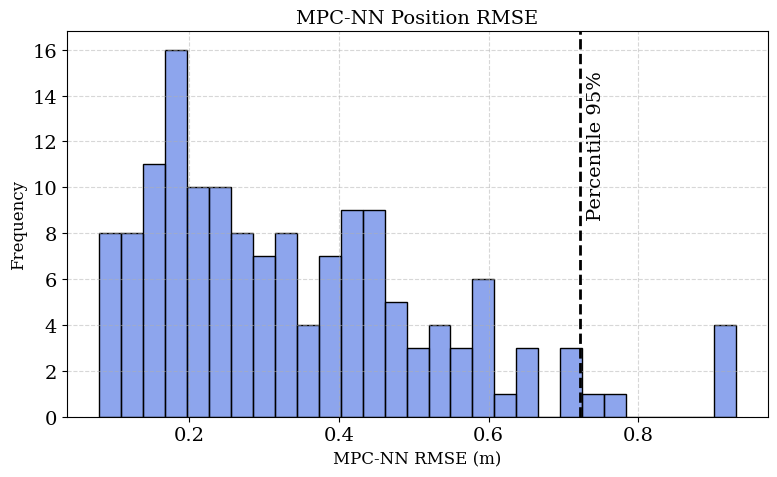

    trajectory_type  sim_id  perc_diff
441            line     108  -0.775614
409            line      76  -0.692464
379            line      46  -0.683812
463            line     130  -0.681619
175    lissajous_xy       2  -0.673920
..              ...     ...        ...
265    lissajous_xy      92   1.170151
433            line     100   1.207701
279    lissajous_xy     106   1.268267
475            line     142   1.533991
453            line     120   1.746520

[149 rows x 3 columns]


In [623]:
analyzer.plot_histogram_temp(df_rotor_failure, 'inter_position_RMSe', 'MPC-NN RMSE (m)', 'MPC-NN Position RMSE', percentile=0.95,show_mean=False,save_name='mpcnn_rmse_1rf.pdf')
print(df_rotor_failure.sort_values('perc_diff',ascending=True)[['trajectory_type','sim_id','perc_diff']])

In [624]:
stats_rmse = analyzer.stats_simulations(df_rotor_failure, 'inter_position_RMSe','inter_position_RMSe')
stats_rmse

,Controller,min,max,mean,std
0,MPC,0.079258,0.930916,0.340704,0.192903
1,Neural Network,0.079258,0.930916,0.340704,0.192903


In [625]:
df_rotor_failure.sort_values('perc_diff')['trajectory_type']

441            line
409            line
379            line
463            line
175    lissajous_xy
           ...     
265    lissajous_xy
433            line
279    lissajous_xy
475            line
453            line
Name: trajectory_type, Length: 149, dtype: object

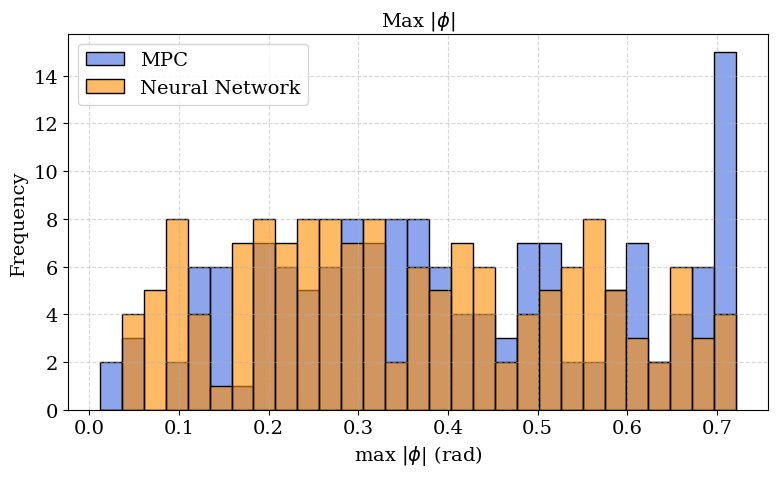

In [626]:
analyzer.plot_histogram(df_normal, 'mpc_max_abs_phi', 'nn_max_abs_phi', 'max $|\\phi$| (rad)', 'Max $|\\phi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

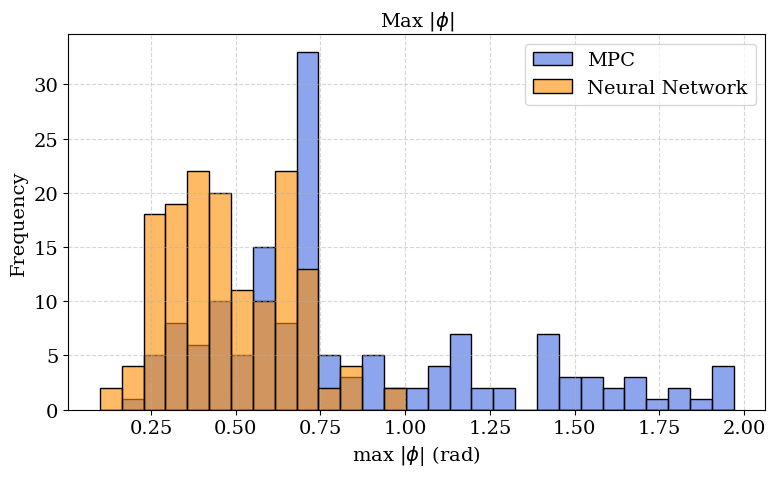

     sim_id  trajectory_id trajectory_type  mpc_max_abs_phi
463     130             65            line         1.969667
379      46             23            line         1.947762
157     158             79       circle_xy         1.920890
425      92             46            line         1.911450
455     122             61            line         1.868559
..      ...            ...             ...              ...
361      28             14            line         0.283551
371      38             19            line         0.250852
465     132             66            line         0.244744
275     102             51    lissajous_xy         0.238108
231      58             29    lissajous_xy         0.226078

[149 rows x 4 columns]


In [627]:
analyzer.plot_histogram(df_rotor_failure, 'mpc_max_abs_phi', 'nn_max_abs_phi', 'max $|\\phi$| (rad)', 'Max $|\\phi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)
print(df_rotor_failure.sort_values('mpc_max_abs_phi', ascending=False)[['sim_id','trajectory_id','trajectory_type','mpc_max_abs_phi']])

R²: 0.3484
R²: 0.4706


poly1d([0.79791076, 0.13604259])

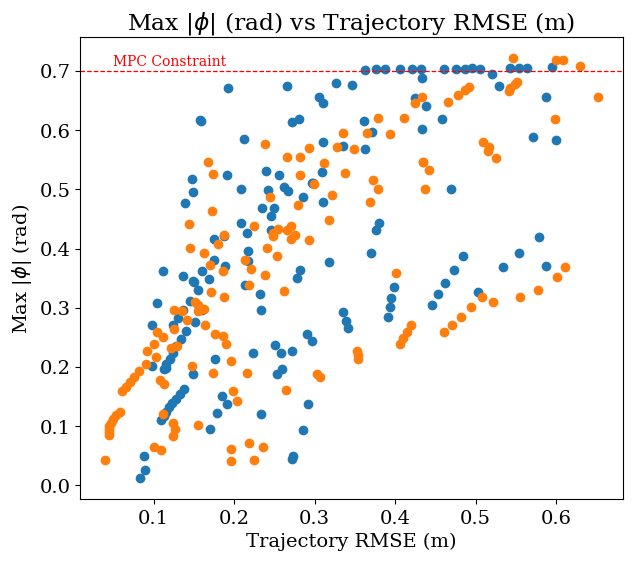

In [628]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#Normal
ax.scatter(df_normal['mpc_RMSe'],df_normal['mpc_max_abs_phi'])
ax.scatter(df_normal['nn_RMSe'],df_normal['nn_max_abs_phi'])
ax.set_xlabel('Trajectory RMSE (m)')
ax.set_ylabel('Max |$\\phi$| (rad)')
ax.set_title('Max |$\\phi$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.05, 0.71, 'MPC Constraint', color='red',fontsize=10)

r2(df_normal['mpc_RMSe'], df_normal['mpc_max_abs_phi'],1)
r2(df_normal['nn_RMSe'], df_normal['nn_max_abs_phi'],1)

Text(0.77, 0.71, 'MPC Constraint')

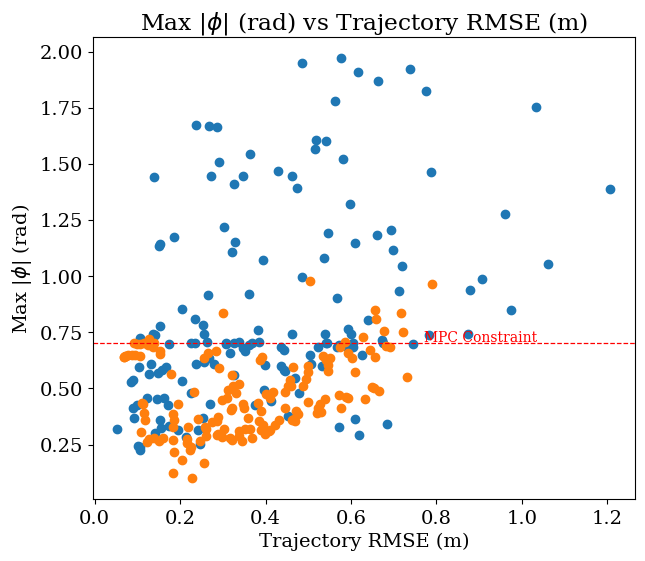

In [629]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#Normal
ax.scatter(df_rotor_failure['mpc_RMSe'],df_rotor_failure['mpc_max_abs_phi'])
ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_phi'])
ax.set_xlabel('Trajectory RMSE (m)')
ax.set_ylabel('Max |$\\phi$| (rad)')
ax.set_title('Max |$\\phi$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

#r2(df_rotor_failure['mpc_RMSe'], df_rotor_failure['mpc_max_abs_phi'],1)
#r2(df_rotor_failure['nn_RMSe'], df_rotor_failure['nn_max_abs_phi'],1)

R²: 0.4819
R²: 0.6565


poly1d([0.84794597, 0.09863238])

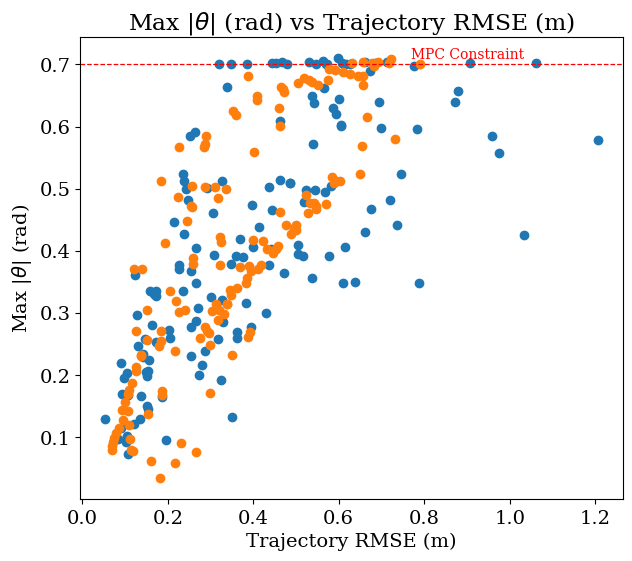

In [630]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#Normal
ax.scatter(df_rotor_failure['mpc_RMSe'],df_rotor_failure['mpc_max_abs_theta'])
ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_theta'])
ax.set_xlabel('Trajectory RMSE (m)')
ax.set_ylabel('Max |$\\theta$| (rad)')
ax.set_title('Max |$\\theta$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

r2(df_rotor_failure['mpc_RMSe'], df_rotor_failure['mpc_max_abs_theta'],1)
r2(df_rotor_failure['nn_RMSe'], df_rotor_failure['nn_max_abs_theta'],1)

R²: 0.4531
R²: 0.3321


poly1d([0.44189366, 0.02359671])

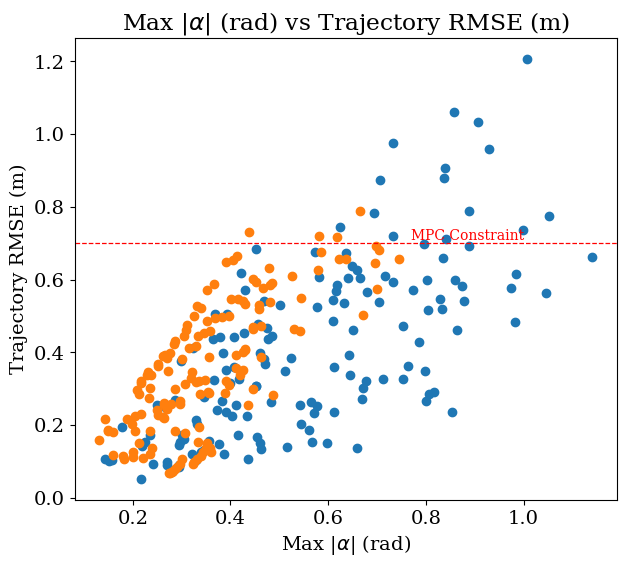

In [631]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#Normal
ax.scatter((df_rotor_failure['mpc_max_abs_phi'] + df_rotor_failure['mpc_max_abs_theta'] + df_rotor_failure['mpc_max_abs_psi'])/3,df_rotor_failure['mpc_RMSe'])
ax.scatter((df_rotor_failure['nn_max_abs_phi'] + df_rotor_failure['nn_max_abs_theta'] + df_rotor_failure['nn_max_abs_psi'])/3,df_rotor_failure['nn_RMSe'])
ax.set_ylabel('Trajectory RMSE (m)')
ax.set_xlabel('Max |$\\alpha$| (rad)')
ax.set_title('Max |$\\alpha$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

r2(df_rotor_failure['mpc_RMSe'], df_rotor_failure['mpc_max_abs_psi'],1)
r2(df_rotor_failure['nn_RMSe'], df_rotor_failure['nn_max_abs_psi'],1)

R²: 0.2003


Text(0.77, 0.71, 'MPC Constraint')

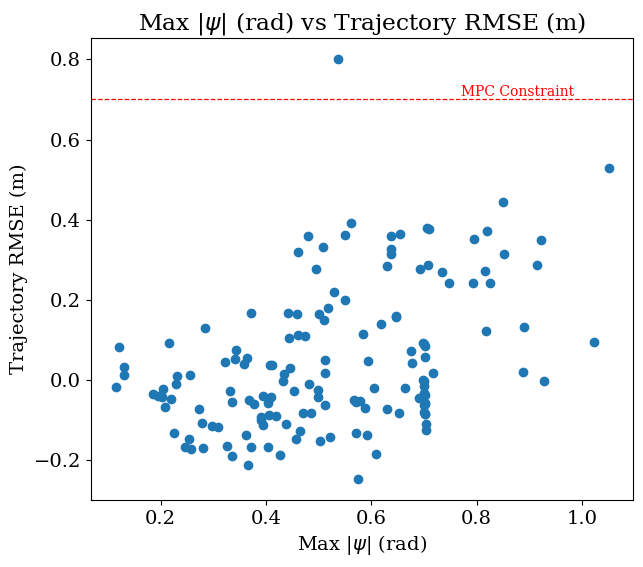

In [632]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

model = r2(np.max(df_rotor_failure[['mpc_max_abs_psi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1), df_rotor_failure['mpc_RMSe'] - df_rotor_failure['nn_RMSe'], 2)

#Normal
ax.scatter(np.max(df_rotor_failure[['mpc_max_abs_psi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1),df_rotor_failure['mpc_RMSe'] - df_rotor_failure['nn_RMSe'])
#ax.plot(np.max(df_rotor_failure[['mpc_max_abs_psi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1),model(np.max(df_rotor_failure[['mpc_max_abs_psi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1)))
#ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_psi'])
ax.set_ylabel('Trajectory RMSE (m)')
ax.set_xlabel('Max |$\\psi$| (rad)')
ax.set_title('Max |$\\psi$| (rad) vs Trajectory RMSE (m)')
ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)


R²: 0.4537


Text(0.5, 1.0, 'Max |$\\psi$| (rad) vs Trajectory RMSE (m)')

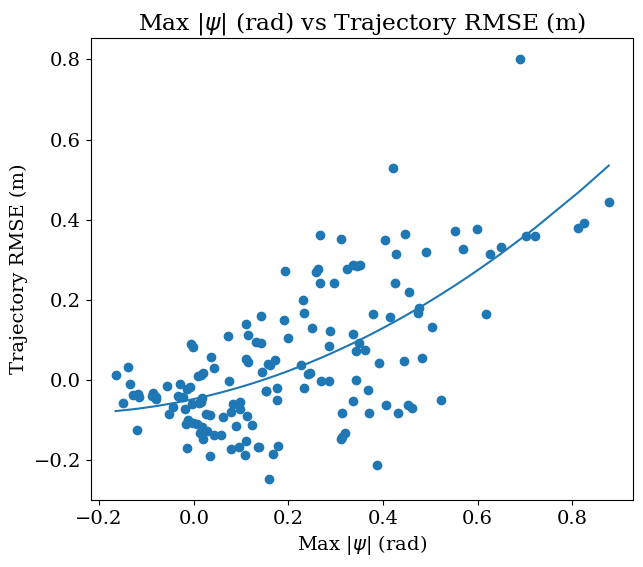

In [633]:
fig, ax = plt.subplots(1,1, figsize=(7,6))

#df_rotor_failure['alpha'] = np.max(df_rotor_failure[['mpc_max_abs_phi','mpc_max_abs_theta','mpc_max_abs_psi']],axis=1)
df_rotor_failure['alpha'] = (df_rotor_failure['mpc_max_abs_phi'] - df_rotor_failure['nn_max_abs_phi'] + df_rotor_failure['mpc_max_abs_theta'] - df_rotor_failure['nn_max_abs_theta'] + df_rotor_failure['mpc_max_abs_psi'] - df_rotor_failure['nn_max_abs_psi'])/3
temp = df_rotor_failure.sort_values('alpha',ascending=True)
#temp = temp[temp['period (s)'] > 0]
x = temp['alpha']
y = temp['mpc_RMSe'] - temp['nn_RMSe']

model = r2(x,y,2)

#Normal
ax.scatter(x,y)
ax.plot(x, model(x))
#ax.scatter(df_rotor_failure['nn_RMSe'],df_rotor_failure['nn_max_abs_psi'])
ax.set_ylabel('Trajectory RMSE (m)')
ax.set_xlabel('Max |$\\psi$| (rad)')
ax.set_title('Max |$\\psi$| (rad) vs Trajectory RMSE (m)')
#ax.axhline(0.7, linestyle='--',color='red',linewidth=0.9)
#ax.text(0.77, 0.71, 'MPC Constraint', color='red',fontsize=10)

In [634]:

#r2(df_rotor_failure['nn_RMSe'], df_rotor_failure['nn_max_abs_psi'])

In [635]:
print(df_rotor_failure.sort_values('nn_max_abs_phi',ascending=False)[['trajectory_type','nn_max_abs_phi', 'radius (m)', 'period (s)']])

    trajectory_type  nn_max_abs_phi  radius (m)  period (s)
49        circle_xy        0.978244         4.0         9.0
77        circle_xy        0.964299         5.5        11.0
75        circle_xy        0.850614         5.0        11.0
99        circle_xy        0.837988         6.0        12.0
449            line        0.835840         NaN         NaN
..              ...             ...         ...         ...
377            line        0.215499         NaN         NaN
493            line        0.182423         NaN         NaN
425            line        0.169163         NaN         NaN
463            line        0.122922         NaN         NaN
483            line        0.098735         NaN         NaN

[149 rows x 4 columns]


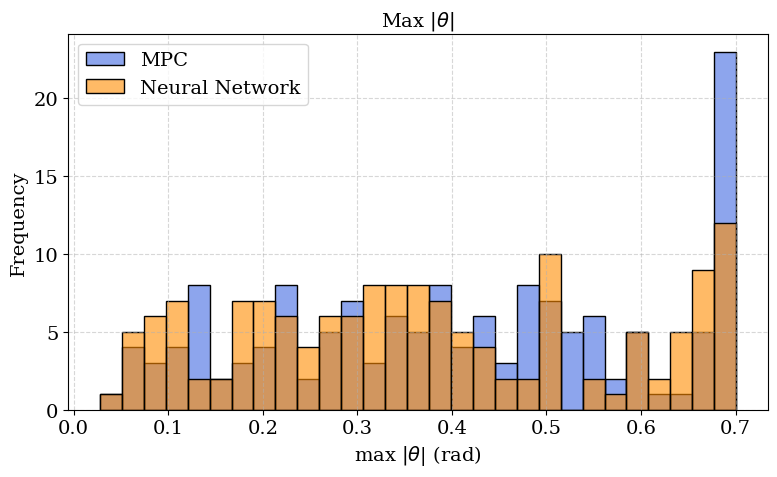

In [636]:
analyzer.plot_histogram(df_normal, 'mpc_max_abs_theta', 'nn_max_abs_theta', 'max $|\\theta$| (rad)', 'Max $|\\theta|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

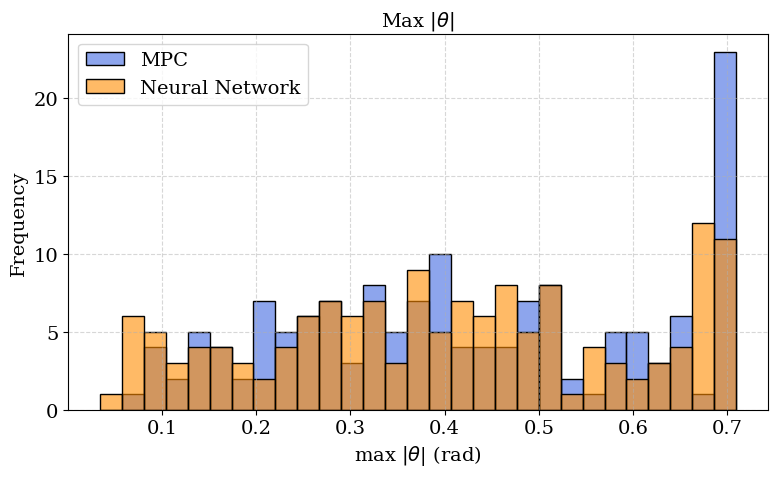

In [637]:
analyzer.plot_histogram(df_rotor_failure, 'mpc_max_abs_theta', 'nn_max_abs_theta', 'max $|\\theta$| (rad)', 'Max $|\\theta|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

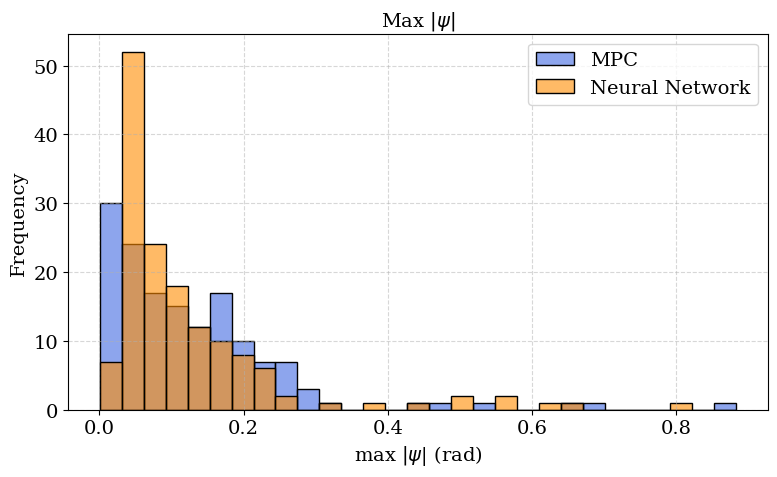

In [638]:
analyzer.plot_histogram(df_normal, 'mpc_max_abs_psi', 'nn_max_abs_psi', 'max $|\\psi$| (rad)', 'Max $|\\psi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

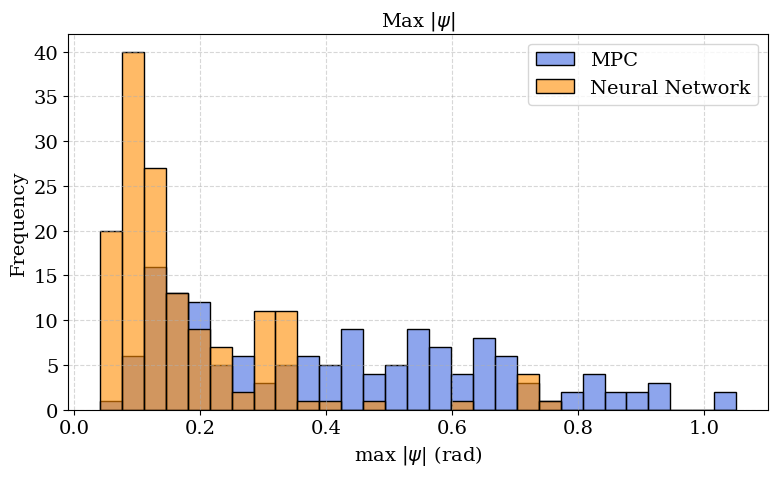

In [639]:
analyzer.plot_histogram(df_rotor_failure, 'mpc_max_abs_psi', 'nn_max_abs_psi', 'max $|\\psi$| (rad)', 'Max $|\\psi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

In [640]:
print('maximum nn RMSEs')
df_total.sort_values('nn_RMSe',ascending=False)[['sim_id','trajectory_type','radius (m)', 'period (s)', 'nn_RMSe']]

maximum nn RMSEs


,sim_id,trajectory_type,radius (m),period (s),nn_RMSe
11,12,circle_xy,6.0,2.0,7.798734
10,11,circle_xy,6.0,2.0,7.505141
5,6,circle_xy,6.0,1.0,7.300485
4,5,circle_xy,6.0,1.0,7.193703
8,9,circle_xy,5.0,2.0,7.039641
...,...,...,...,...,...
258,85,lissajous_xy,0.5,8.0,0.045021
244,71,lissajous_xy,0.5,7.5,0.044897
272,99,lissajous_xy,0.5,8.5,0.044110
350,17,line,NaN,NaN,0.039738


In [641]:
print('cases where nn_RMSE < mpc_RMSE')
df_nn_lower_than_mpc = df_total[df_total['nn_RMSe'] < df_total['mpc_RMSe']]
print('number of cases:',len(df_nn_lower_than_mpc))
print(df_nn_lower_than_mpc.groupby(['trajectory_type','operation_mode']).count()['nn_RMSe'])

cases where nn_RMSE < mpc_RMSE
number of cases: 228
trajectory_type  operation_mode
circle_xy        normal             8
                 total_failure     45
line             normal            42
                 total_failure     55
lissajous_xy     normal            45
                 total_failure     33
Name: nn_RMSe, dtype: int64


In [642]:
df_rotor_failure.sort_values('mpc_max_abs_phi',ascending=False)[['trajectory_type','operation_mode','mpc_max_abs_phi','nn_max_abs_phi','mpc_RMSe','nn_RMSe']].head(20)

,trajectory_type,operation_mode,mpc_max_abs_phi,nn_max_abs_phi,mpc_RMSe,nn_RMSe
463,line,total_failure,1.969667,0.122922,0.576540,0.183560
379,line,total_failure,1.947762,0.655003,0.484990,0.153348
157,circle_xy,total_failure,1.920890,0.314397,0.737378,0.409344
425,line,total_failure,1.911450,0.169163,0.615634,0.255558
455,line,total_failure,1.868559,0.328591,0.662462,0.218932
481,line,total_failure,1.823800,0.687947,0.775631,0.682991
443,line,total_failure,1.781821,0.327883,0.563112,0.184334
441,line,total_failure,1.755684,0.483669,1.033475,0.231897
449,line,total_failure,1.674370,0.835840,0.237427,0.299612
261,lissajous_xy,total_failure,1.670614,0.698521,0.267039,0.098567


In [643]:
df_rotor_failure[df_rotor_failure['mpc_max_abs_phi'] > 0.7].groupby('trajectory_type').count()
#print(len(df_normal),len(df_rotor_failure))

,sim_id,trajectory_id,disturbed_inputs,simulation_time (s),time_sample (s),N,M,mpc_success,num_iterations,mpc_RMSe,...,RMSe_u7,global_id,perc_diff,nn_max_abs_phi,mpc_max_abs_phi,nn_max_abs_theta,mpc_max_abs_theta,nn_max_abs_psi,mpc_max_abs_psi,alpha
trajectory_type,,,,,,,,,,,,,,,,,,,,,
circle_xy,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
line,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
lissajous_xy,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32


In [644]:
# Trajetorias com baixo perc_diff
df_rotor_failure[df_rotor_failure['trajectory_type'] == 'circle_xy'].sort_values('inter_position_RMSe',ascending=True)[['sim_id','trajectory_type','period (s)','radius (m)', 'mpc_max_abs_phi','nn_max_abs_phi','mpc_RMSe','nn_RMSe','global_id']]

,sim_id,trajectory_type,period (s),radius (m),mpc_max_abs_phi,nn_max_abs_phi,mpc_RMSe,nn_RMSe,global_id
165,166,circle_xy,15.0,7.5,0.290983,0.451830,0.617613,0.631869,circle_xy83
97,98,circle_xy,12.0,5.5,0.329124,0.728658,0.570862,0.627190,circle_xy49
145,146,circle_xy,14.0,7.5,0.342914,0.750373,0.685104,0.721273,circle_xy73
117,118,circle_xy,13.0,5.5,0.375054,0.452940,0.452780,0.538418,circle_xy59
135,136,circle_xy,14.0,5.0,0.679220,0.309040,0.348193,0.407850,circle_xy68
139,140,circle_xy,14.0,6.0,0.575331,0.394098,0.444846,0.529439,circle_xy70
159,160,circle_xy,15.0,6.0,0.704588,0.361952,0.385737,0.465544,circle_xy80
163,164,circle_xy,15.0,7.0,0.544488,0.414235,0.467919,0.576174,circle_xy82
75,76,circle_xy,11.0,5.0,0.598101,0.850614,0.530991,0.656458,circle_xy38
95,96,circle_xy,12.0,5.0,0.363772,0.636373,0.608392,0.550406,circle_xy48


In [645]:
df_normal[df_normal['global_id'] == 'circle_xy80'][['sim_id']]

,sim_id
158,159


In [646]:
df_first_mpc_rmse = df_rotor_failure.sort_values(['mpc_RMSe','mpc_max_abs_phi'],ascending=[True,False])[['trajectory_type','mpc_max_abs_phi','period (s)', 'radius (m)','mpc_RMSe','mpc_max_abs_phi']]
df_first_mpc_rmse.head(15)

,trajectory_type,mpc_max_abs_phi,period (s),radius (m),mpc_RMSe,mpc_max_abs_phi
189,lissajous_xy,0.319018,5.5,0.5,0.053055,0.319018
245,lissajous_xy,0.528245,7.5,0.5,0.084465,0.528245
217,lissajous_xy,0.537212,6.5,0.5,0.089465,0.537212
205,lissajous_xy,0.412408,6.0,1.0,0.090754,0.412408
277,lissajous_xy,0.368119,8.5,1.5,0.092288,0.368119
263,lissajous_xy,0.423904,8.0,1.5,0.098387,0.423904
465,line,0.244744,NaN,NaN,0.101029,0.244744
219,lissajous_xy,0.597142,6.5,1.0,0.103287,0.597142
275,lissajous_xy,0.238108,8.5,1.0,0.105127,0.238108
231,lissajous_xy,0.226078,7.0,0.5,0.106654,0.226078
